<a href="https://colab.research.google.com/github/gyeongdong13/Competition/blob/main/%EA%B0%95%EC%84%9C%EA%B5%AC_%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B3%B5%EB%AA%A8%EC%A0%84(%EA%B5%B0%EC%A7%91%ED%99%94).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/park(데이터 분석용)-PCA 적용결과.csv', encoding='utf-8')
df

,법정동,노인 인구수,외부장애,내부장애,정신적 장애,장애인 주차장,공원 수,대중교통 수,총인구,대중교통 이용량,인구밀도
0,가양동,10919,3661,536,699,4,3,100,62939,2.781974e+05,9407.922
1,개화동,4828,1270,101,234,0,1,38,23371,7.320984e+05,3493.423
2,내발산동,10634,2202,196,340,2,3,88,79119,3.161334e+05,18314.583
3,등촌동,12831,3933,379,287,6,5,67,74871,4.152200e+05,32552.609
4,마곡동,3100,645,69,82,0,1,70,34359,3.974248e+05,7310.426
5,방화동,16675,4289,370,579,6,3,93,88766,2.991370e+05,9030.112
6,염창동,4385,842,76,129,3,2,17,41628,1.636455e+06,23924.138
7,화곡동,38117,7459,657,1822,14,4,204,239271,1.363713e+05,34035.704


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/서울시 버스 정류소 좌표 데이터(2022.11.30).csv', encoding='utf-8')
df

,NODE_ID,ARS-ID,정류소명,X좌표,Y좌표
0,100000001,1001,종로2가사거리,126.987750,37.569765
1,100000002,1002,창경궁.서울대학교병원,126.996566,37.579183
2,100000003,1003,명륜3가.성대입구,126.998340,37.582671
3,100000004,1004,종로2가.삼일교,126.987613,37.568579
4,100000005,1005,혜화동로터리.여운형활동터,127.001744,37.586243
...,...,...,...,...,...
11221,124000334,25995,우성아파트,127.139339,37.550386
11222,124000333,25996,우성아파트,127.140046,37.550643
11223,124000332,25997,조일약국,127.123596,37.533630
11224,124000331,25998,성내시장,127.125497,37.536155


In [ ]:
!pip install geopy
from geopy.geocoders import Nominatim
geo_local = Nominatim(user_agent="Sount Korea")

# reverse geocoding
def reverse_geo(col):
    lat = col[4] #위도 컬럼 인덱스
    lon = col[3] #경도 컬럼 인덱스
    location = geo_local.reverse(str(lat)+","+str(lon)) #(위도, 경도)
    address_list = location.address.replace(" ","")
    address_list = address_list.split(',')
    address_list.reverse()
    return " ".join(address_list[2:-1]) + " "+address_list[-1]

df["주소"] = df.apply(reverse_geo, axis=1)
df

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,NODE_ID,ARS-ID,정류소명,X좌표,Y좌표,주소
0,100000001,1001,종로2가사거리,126.987750,37.569765,서울 성북구 정릉2동 북악산로1다길 서울한양도성
1,100000002,1002,창경궁.서울대학교병원,126.996566,37.579183,서울 종로구 이화동 연건동 창경궁로 185 창경궁
2,100000003,1003,명륜3가.성대입구,126.998340,37.582671,서울 종로구 종로1·2·3·4가동 혜화동 창경궁로 Subway
3,100000004,1004,종로2가.삼일교,126.987613,37.568579,서울 성북구 정릉2동 북악산로1다길 서울한양도성
4,100000005,1005,혜화동로터리.여운형활동터,127.001744,37.586243,서울 종로구 삼선동 혜화동 명륜2가 창경궁로 혜화동로터리.여운형활동터
...,...,...,...,...,...,...
11221,124000334,25995,우성아파트,127.139339,37.550386,서울 강동구 천호1동 구천면로 우성아파트
11222,124000333,25996,우성아파트,127.140046,37.550643,서울 강동구 암사1동 구천면로 우성아파트
11223,124000332,25997,조일약국,127.123596,37.533630,서울 강동구 성내2동 천호옛길 조일약국
11224,124000331,25998,성내시장,127.125497,37.536155,서울 강동구 성내2동 천호옛길 성내시장


In [ ]:
df.to_csv("bus_station.csv", header=False, index=False, encoding="utf-8-sig")

In [ ]:
df

,NODE_ID,ARS-ID,정류소명,X좌표,Y좌표,주소
0,100000001,1001,종로2가사거리,126.987750,37.569765,서울 성북구 정릉2동 북악산로1다길 서울한양도성
1,100000002,1002,창경궁.서울대학교병원,126.996566,37.579183,서울 종로구 이화동 연건동 창경궁로 185 창경궁
2,100000003,1003,명륜3가.성대입구,126.998340,37.582671,서울 종로구 종로1·2·3·4가동 혜화동 창경궁로 Subway
3,100000004,1004,종로2가.삼일교,126.987613,37.568579,서울 성북구 정릉2동 북악산로1다길 서울한양도성
4,100000005,1005,혜화동로터리.여운형활동터,127.001744,37.586243,서울 종로구 삼선동 혜화동 명륜2가 창경궁로 혜화동로터리.여운형활동터
...,...,...,...,...,...,...
11221,124000334,25995,우성아파트,127.139339,37.550386,서울 강동구 천호1동 구천면로 우성아파트
11222,124000333,25996,우성아파트,127.140046,37.550643,서울 강동구 암사1동 구천면로 우성아파트
11223,124000332,25997,조일약국,127.123596,37.533630,서울 강동구 성내2동 천호옛길 조일약국
11224,124000331,25998,성내시장,127.125497,37.536155,서울 강동구 성내2동 천호옛길 성내시장


In [ ]:
import pandas as pd
df1 = pd.read_csv('/content/drive/MyDrive/bus_station.csv', encoding='utf-8')
df1

,NODE_ID,ARS-ID,정류소명,X좌표,Y좌표,주소
0,100000001,1001,종로2가사거리,126.987750,37.569765,서울 성북구 정릉2동 북악산로1다길 서울한양도성
1,100000002,1002,창경궁.서울대학교병원,126.996566,37.579183,서울 종로구 이화동 연건동 창경궁로 185 창경궁
2,100000003,1003,명륜3가.성대입구,126.998340,37.582671,서울 종로구 종로1·2·3·4가동 혜화동 창경궁로 Subway
3,100000004,1004,종로2가.삼일교,126.987613,37.568579,서울 성북구 정릉2동 북악산로1다길 서울한양도성
4,100000005,1005,혜화동로터리.여운형활동터,127.001744,37.586243,서울 종로구 삼선동 혜화동 명륜2가 창경궁로 혜화동로터리.여운형활동터
...,...,...,...,...,...,...
11221,124000334,25995,우성아파트,127.139338,37.550386,서울 강동구 천호1동 구천면로 우성아파트
11222,124000333,25996,우성아파트,127.140046,37.550643,서울 강동구 암사1동 구천면로 우성아파트
11223,124000332,25997,조일약국,127.123596,37.533630,서울 강동구 성내2동 천호옛길 조일약국
11224,124000331,25998,성내시장,127.125497,37.536155,서울 강동구 성내2동 천호옛길 성내시장


In [ ]:
df1 = df1[df1["주소"].str.contains("서울 강서구")]
df1

,NODE_ID,ARS-ID,정류소명,X좌표,Y좌표,주소
6112,114000402,15414,보람쉬움아파트,126.835774,37.529758,서울 강서구 화곡1동 곰달래로
6113,114000403,15415,보람쉬움아파트.신영시장,126.835242,37.529904,서울 강서구 화곡1동 곰달래로
6199,115000001,16001,염창역.서울도시가스,126.875881,37.547097,서울 강서구 염창동 공항대로 637 올리브영
6201,115000003,16003,등촌역.강서보건소,126.868652,37.549005,서울 강서구 염창동 공항대로 강서보건소
6203,115000005,16005,등촌중학교.백석초등학교,126.861554,37.552628,서울 강서구 등촌1동 공항대로 백석초등학교정보문화진흥원
...,...,...,...,...,...,...
6816,115000571,16993,김포공항세관.국립항공박물관,126.808068,37.555661,서울 강서구 공항동 하늘길 176 김포공항아시아나항공정비고
6817,115900146,16994,강원슈퍼,126.857026,37.535516,서울 강서구 화곡4동 곰달래로53길
6818,115000568,16995,대한항공빌딩,126.814569,37.550734,서울 강서구 발산1동 공항동 하늘길 대한항공빌딩
6819,115000563,16996,대한항공,126.816854,37.549578,서울 강서구 발산1동 외발산동 방화대로 94 메이필드호텔(MayfieldHotel)


In [ ]:
# 주소 데이터 전처리
def get_addrs(x) :
  x1 = x.split(" ")
  return " ".join(x1[2:3])

# 주소 전처리
df1["지번주소"] = df1["주소"].apply(get_addrs)
df1

<ipython-input-7-0848113de4df>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["지번주소"] = df1["주소"].apply(get_addrs)


,NODE_ID,ARS-ID,정류소명,X좌표,Y좌표,주소,지번주소
6112,114000402,15414,보람쉬움아파트,126.835774,37.529758,서울 강서구 화곡1동 곰달래로,화곡1동
6113,114000403,15415,보람쉬움아파트.신영시장,126.835242,37.529904,서울 강서구 화곡1동 곰달래로,화곡1동
6199,115000001,16001,염창역.서울도시가스,126.875881,37.547097,서울 강서구 염창동 공항대로 637 올리브영,염창동
6201,115000003,16003,등촌역.강서보건소,126.868652,37.549005,서울 강서구 염창동 공항대로 강서보건소,염창동
6203,115000005,16005,등촌중학교.백석초등학교,126.861554,37.552628,서울 강서구 등촌1동 공항대로 백석초등학교정보문화진흥원,등촌1동
...,...,...,...,...,...,...,...
6816,115000571,16993,김포공항세관.국립항공박물관,126.808068,37.555661,서울 강서구 공항동 하늘길 176 김포공항아시아나항공정비고,공항동
6817,115900146,16994,강원슈퍼,126.857026,37.535516,서울 강서구 화곡4동 곰달래로53길,화곡4동
6818,115000568,16995,대한항공빌딩,126.814569,37.550734,서울 강서구 발산1동 공항동 하늘길 대한항공빌딩,발산1동
6819,115000563,16996,대한항공,126.816854,37.549578,서울 강서구 발산1동 외발산동 방화대로 94 메이필드호텔(MayfieldHotel),발산1동


In [ ]:
df1.groupby("지번주소")["정류소명"].count()

지번주소
가양1동    67
가양2동    15
가양3동    16
강서구      3
공항동     62
등촌1동    12
등촌2동     9
등촌3동    45
발산1동    62
방화1동    34
방화2동    37
방화3동    19
염창동     36
우장산동    25
화곡1동    28
화곡2동    35
화곡3동     5
화곡4동    25
화곡6동    29
화곡8동    27
화곡본동    27
Name: 정류소명, dtype: int64

# PCA

In [ ]:
import pandas as pd
park = pd.read_csv('/content/drive/MyDrive/park(데이터 분석용).csv', encoding='utf-8')
park

,법정동,공원 수,공원 면적률,일반 주차장,장애인 주차장,노인 인구수,외부장애,내부장애,정신적 장애,대중교통 수,사회복지시설 수,총인구,대중교통 이용량,인구밀도
0,가양동,3,0.03,1,4,10919,3661,536,699,100,8,62939,2.781974e+05,9407.922
1,개화동,1,0.06,0,0,4828,1270,101,234,38,3,23371,7.320984e+05,3493.423
2,내발산동,3,0.07,1,2,10634,2202,196,340,88,0,79119,3.161334e+05,18314.583
3,등촌동,5,0.02,3,6,12831,3933,379,287,67,3,74871,4.152200e+05,32552.609
4,마곡동,1,0.00,4,0,3100,645,69,82,70,4,34359,3.974248e+05,7310.426
5,방화동,3,0.04,1,6,16675,4289,370,579,93,3,88766,2.991370e+05,9030.112
6,염창동,2,0.02,0,3,4385,842,76,129,17,0,41628,1.636455e+06,23924.138
7,화곡동,2,0.14,24,14,38117,7459,657,1822,204,12,239271,1.363713e+05,34035.704


In [ ]:
park = park[["공원 수", "공원 면적률", "일반 주차장", "장애인 주차장", "노인 인구수", "외부장애", "내부장애 ", "정신적 장애", "대중교통 수", "사회복지시설 수", "총인구", "대중교통 이용량", "인구밀도"]]
park

,공원 수,공원 면적률,일반 주차장,장애인 주차장,노인 인구수,외부장애,내부장애,정신적 장애,대중교통 수,사회복지시설 수,총인구,대중교통 이용량,인구밀도
0,3,0.03,1,4,10919,3661,536,699,100,8,62939,2.781974e+05,9407.922
1,1,0.06,0,0,4828,1270,101,234,38,3,23371,7.320984e+05,3493.423
2,3,0.07,1,2,10634,2202,196,340,88,0,79119,3.161334e+05,18314.583
3,5,0.02,3,6,12831,3933,379,287,67,3,74871,4.152200e+05,32552.609
4,1,0.00,4,0,3100,645,69,82,70,4,34359,3.974248e+05,7310.426
5,3,0.04,1,6,16675,4289,370,579,93,3,88766,2.991370e+05,9030.112
6,2,0.02,0,3,4385,842,76,129,17,0,41628,1.636455e+06,23924.138
7,2,0.14,24,14,38117,7459,657,1822,204,12,239271,1.363713e+05,34035.704


In [ ]:
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(park)
pca = PCA(n_components=3)

# 데이터 변환
X_transformed = pca.fit_transform(X)

# 분산비율
pca.explained_variance_ratio_

array([0.7127329 , 0.1223262 , 0.09445929])

In [ ]:
pca = pca.components_
pca

array([[ 0.06142832,  0.26566771,  0.29681047,  0.3113781 ,  0.32406632,
         0.31613473,  0.29212746,  0.32011369,  0.31429167,  0.27290157,
         0.32042152, -0.18851336,  0.19068643],
       [ 0.74487749, -0.21437008, -0.1771133 ,  0.15271461,  0.00836663,
         0.13804618,  0.15713186, -0.1321111 , -0.12653364, -0.24008587,
        -0.01337971,  0.05706256,  0.45404237],
       [-0.24575786,  0.21234849,  0.22914283,  0.15071799,  0.07154926,
        -0.1090659 , -0.2667267 ,  0.04088582, -0.13925571, -0.17956289,
         0.15161772,  0.66177669,  0.46571246]])

In [ ]:
columns = ["공원수", "공원면적률", "일반주차장 수", "장애인주차장 수", "노인인구", "외부장애 인구", "내부장애 인구", "정신적장애 인구", "대중교통 수", "사회복지시설 수", "총인구", "대중교통 이용량", "인구밀도"]

pca = pd.DataFrame(pca, columns=columns)

pca.rename(index={0:"PCA1", 1:"PCA2", 2:"PCA3"})

,공원수,공원면적률,일반주차장 수,장애인주차장 수,노인인구,외부장애 인구,내부장애 인구,정신적장애 인구,대중교통 수,사회복지시설 수,총인구,대중교통 이용량,인구밀도
PCA1,0.061428,0.265668,0.296810,0.311378,0.324066,0.316135,0.292127,0.320114,0.314292,0.272902,0.320422,-0.188513,0.190686
PCA2,0.744877,-0.214370,-0.177113,0.152715,0.008367,0.138046,0.157132,-0.132111,-0.126534,-0.240086,-0.013380,0.057063,0.454042
PCA3,-0.245758,0.212348,0.229143,0.150718,0.071549,-0.109066,-0.266727,0.040886,-0.139256,-0.179563,0.151618,0.661777,0.465712


In [ ]:
# 주성분 1에서 가장 큰 기여도를 가진 변수들의 인덱스 출력
important_vars = np.argsort(np.abs(pca.components_[0]))[::-1][:2]
print(important_vars)

[ 4 10]


In [ ]:
# 주성분 2에서 가장 큰 기여도를 가진 변수들의 인덱스 출력
important_vars = np.argsort(np.abs(pca.components_[1]))[::-1][:2]
print(important_vars)

[ 0 12]


In [ ]:
# 주성분 3에서 가장 큰 기여도를 가진 변수들의 인덱스 출력
important_vars = np.argsort(np.abs(pca.components_[2]))[::-1][:2]
print(important_vars)

[11 12]


# Hierarchical Clustering

In [ ]:
park

,공원 수,공원 면적률,일반 주차장,장애인 주차장,노인 인구수,외부장애,내부장애,정신적 장애,대중교통 수,사회복지시설 수,총인구,대중교통 이용량,인구밀도
0,3,0.03,1,4,10919,3661,536,699,100,8,62939,2.781974e+05,9407.922
1,1,0.06,0,0,4828,1270,101,234,38,3,23371,7.320984e+05,3493.423
2,3,0.07,1,2,10634,2202,196,340,88,0,79119,3.161334e+05,18314.583
3,5,0.02,3,6,12831,3933,379,287,67,3,74871,4.152200e+05,32552.609
4,1,0.00,4,0,3100,645,69,82,70,4,34359,3.974248e+05,7310.426
5,3,0.04,1,6,16675,4289,370,579,93,3,88766,2.991370e+05,9030.112
6,2,0.02,0,3,4385,842,76,129,17,0,41628,1.636455e+06,23924.138
7,2,0.14,24,14,38117,7459,657,1822,204,12,239271,1.363713e+05,34035.704


In [ ]:
pca0 = park[["장애인 주차장", "노인 인구수", "외부장애", "내부장애 ", "정신적 장애"]]
pca0

,장애인 주차장,노인 인구수,외부장애,내부장애,정신적 장애
0,4,10919,3661,536,699
1,0,4828,1270,101,234
2,2,10634,2202,196,340
3,6,12831,3933,379,287
4,0,3100,645,69,82
5,6,16675,4289,370,579
6,3,4385,842,76,129
7,14,38117,7459,657,1822


In [ ]:
#정규화
from sklearn.preprocessing import MinMaxScaler

data_scaler = MinMaxScaler()
data_x = data_scaler.fit_transform(pca0)

In [ ]:
data_x = pd.DataFrame(data_x)
data_x

,0,1,2,3,4
0,0.285714,0.223292,0.442618,0.794218,0.354598
1,0.000000,0.049347,0.091723,0.054422,0.087356
2,0.142857,0.215153,0.228500,0.215986,0.148276
3,0.428571,0.277894,0.482536,0.527211,0.117816
4,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.428571,0.387669,0.534781,0.511905,0.285632
6,0.214286,0.036696,0.028911,0.011905,0.027011
7,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from scipy.spatial.distance import pdist, squareform
Y = pdist(data_x)
Y

array([0.92397652, 0.66576351, 0.39030903, 1.04111664, 0.37467178,
       0.96457221, 1.37224092, 0.31051868, 0.78300637, 0.14642787,
       0.86199744, 0.23552694, 2.11086337, 0.49788729, 0.43306696,
       0.55824466, 0.36488191, 1.81273347, 0.88632455, 0.20779005,
       0.76397372, 1.45516848, 0.9816231 , 0.22129661, 2.23606798,
       0.86133   , 1.29091704, 2.10032216])

In [ ]:
row_dist = pd.DataFrame(squareform(pdist(data_x, metric = "euclidean")))
row_dist

,0,1,2,3,4,5,6,7
0,0.000000,0.923977,0.665764,0.390309,1.041117,0.374672,0.964572,1.372241
1,0.923977,0.000000,0.310519,0.783006,0.146428,0.861997,0.235527,2.110863
2,0.665764,0.310519,0.000000,0.497887,0.433067,0.558245,0.364882,1.812733
3,0.390309,0.783006,0.497887,0.000000,0.886325,0.207790,0.763974,1.455168
4,1.041117,0.146428,0.433067,0.886325,0.000000,0.981623,0.221297,2.236068
5,0.374672,0.861997,0.558245,0.207790,0.981623,0.000000,0.861330,1.290917
6,0.964572,0.235527,0.364882,0.763974,0.221297,0.861330,0.000000,2.100322
7,1.372241,2.110863,1.812733,1.455168,2.236068,1.290917,2.100322,0.000000


In [ ]:
from scipy.cluster.hierarchy import linkage
import numpy as np

row_clusters = linkage(pdist(data_x, metric = "euclidean"), method = "ward")
row_clusters = linkage(data_x.values, metric = "euclidean", method = "ward")
pd.DataFrame(row_clusters, index = ["cluster %d"%(i+1) for i in range(row_clusters.shape[0])])

,0,1,2,3
cluster 1,1.0,4.0,0.146428,2.0
cluster 2,3.0,5.0,0.207790,2.0
cluster 3,6.0,8.0,0.249966,3.0
cluster 4,0.0,9.0,0.425152,3.0
cluster 5,2.0,10.0,0.433097,4.0
cluster 6,11.0,12.0,1.458625,7.0
cluster 7,7.0,13.0,2.318869,8.0


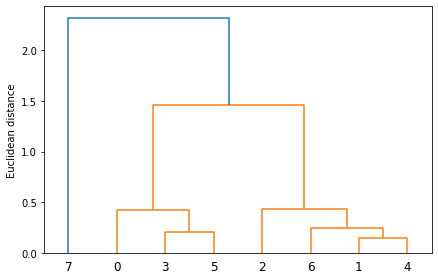

In [ ]:
# 덴드로그램
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

row_dendr = sch.dendrogram(row_clusters)

plt.tight_layout()
plt.ylabel("Euclidean distance")
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

k_range = range(2,7)
for k in k_range :
  average_clustering = AgglomerativeClustering(n_clusters = k, linkage = "ward")
  average_cluster = average_clustering.fit_predict(data_x)
  score = silhouette_score(data_x, average_cluster)
  print(score)

0.5630872095697816
0.5379422520680364
0.32969809819084483
0.28093260860594566
0.20370623423901718


In [ ]:
pca1 = park[["대중교통 이용량", "인구밀도", "대중교통 수", "총인구"]]
pca1

,대중교통 이용량,인구밀도,대중교통 수,총인구
0,2.781974e+05,9407.922,100,62939
1,7.320984e+05,3493.423,38,23371
2,3.161334e+05,18314.583,88,79119
3,4.152200e+05,32552.609,67,74871
4,3.974248e+05,7310.426,70,34359
5,2.991370e+05,9030.112,93,88766
6,1.636455e+06,23924.138,17,41628
7,1.363713e+05,34035.704,204,239271


In [ ]:
#정규화
from sklearn.preprocessing import MinMaxScaler

data_scaler = MinMaxScaler()
data_x = data_scaler.fit_transform(pca1)

In [ ]:
from scipy.cluster.hierarchy import linkage
import numpy as np

row_clusters = linkage(pdist(pca1, metric = "euclidean"), method = "ward")
row_clusters = linkage(pca1.values, metric = "euclidean", method = "ward")
pd.DataFrame(row_clusters, index = ["cluster %d"%(i+1) for i in range(row_clusters.shape[0])])

,0,1,2,3
cluster 1,2.0,5.0,2.163664e+04,2.0
cluster 2,0.0,8.0,4.204627e+04,3.0
cluster 3,3.0,4.0,5.094170e+04,2.0
cluster 4,9.0,10.0,1.720210e+05,5.0
cluster 5,7.0,11.0,3.455533e+05,6.0
cluster 6,1.0,12.0,5.650072e+05,7.0
cluster 7,6.0,13.0,1.679338e+06,8.0


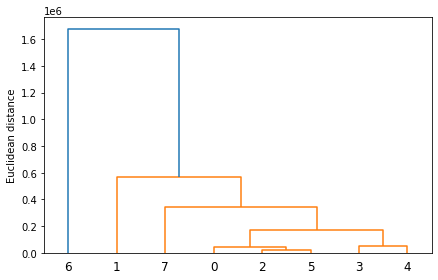

In [ ]:
# 덴드로그램
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

row_dendr = sch.dendrogram(row_clusters)

plt.tight_layout()
plt.ylabel("Euclidean distance")
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

k_range = range(2,7)
for k in k_range :
  average_clustering = AgglomerativeClustering(n_clusters = k, linkage = "ward")
  average_cluster = average_clustering.fit_predict(pca1)
  score = silhouette_score(pca1, average_cluster)
  print(score)

0.7072033961660843
0.49699038364141085
0.4298377810001166
0.40680402441882957
0.26332397753749476


# K-means

In [ ]:
pca0 = park[["장애인 주차장", "노인 인구수", "외부장애", "내부장애 ", "정신적 장애"]]
pca0

,장애인 주차장,노인 인구수,외부장애,내부장애,정신적 장애
0,4,10919,3661,536,699
1,0,4828,1270,101,234
2,2,10634,2202,196,340
3,6,12831,3933,379,287
4,0,3100,645,69,82
5,6,16675,4289,370,579
6,3,4385,842,76,129
7,14,38117,7459,657,1822


In [ ]:
#정규화
from sklearn.preprocessing import MinMaxScaler

data_scaler = MinMaxScaler()
data_x = data_scaler.fit_transform(pca0)

In [ ]:
data_x = pd.DataFrame(data_x)
data_x

,0,1,2,3,4
0,0.285714,0.223292,0.442618,0.794218,0.354598
1,0.000000,0.049347,0.091723,0.054422,0.087356
2,0.142857,0.215153,0.228500,0.215986,0.148276
3,0.428571,0.277894,0.482536,0.527211,0.117816
4,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.428571,0.387669,0.534781,0.511905,0.285632
6,0.214286,0.036696,0.028911,0.011905,0.027011
7,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.cluster import KMeans

ks = range(1,8)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(data_x)
    inertias.append(model.inertia_)


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

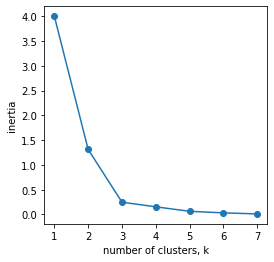

In [ ]:
import matplotlib.pyplot as plt

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3).fit(data_x)

park["cluster"] = kmeans.labels_
park

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,법정동,공원 수,공원 면적률,일반 주차장,장애인 주차장,노인 인구수,외부장애,내부장애,정신적 장애,대중교통 수,사회복지시설 수,총인구,대중교통 이용량,인구밀도,cluster
0,가양동,3,0.03,1,4,10919,3661,536,699,100,8,62939,2.781974e+05,9407.922,1
1,개화동,1,0.06,0,0,4828,1270,101,234,38,3,23371,7.320984e+05,3493.423,0
2,내발산동,3,0.07,1,2,10634,2202,196,340,88,0,79119,3.161334e+05,18314.583,0
3,등촌동,5,0.02,3,6,12831,3933,379,287,67,3,74871,4.152200e+05,32552.609,1
4,마곡동,1,0.00,4,0,3100,645,69,82,70,4,34359,3.974248e+05,7310.426,0
5,방화동,3,0.04,1,6,16675,4289,370,579,93,3,88766,2.991370e+05,9030.112,1
6,염창동,2,0.02,0,3,4385,842,76,129,17,0,41628,1.636455e+06,23924.138,0
7,화곡동,2,0.14,24,14,38117,7459,657,1822,204,12,239271,1.363713e+05,34035.704,2


In [ ]:
pca1 = park[["대중교통 이용량", "인구밀도", "대중교통 수", "총인구"]]
pca1

,대중교통 이용량,인구밀도,대중교통 수,총인구
0,2.781974e+05,9407.922,100,62939
1,7.320984e+05,3493.423,38,23371
2,3.161334e+05,18314.583,88,79119
3,4.152200e+05,32552.609,67,74871
4,3.974248e+05,7310.426,70,34359
5,2.991370e+05,9030.112,93,88766
6,1.636455e+06,23924.138,17,41628
7,1.363713e+05,34035.704,204,239271


In [ ]:
#정규화
from sklearn.preprocessing import MinMaxScaler

data_scaler = MinMaxScaler()
data_x = data_scaler.fit_transform(pca1)

In [ ]:
data_x = pd.DataFrame(data_x)
data_x

,0,1,2,3
0,0.094545,0.193650,0.443850,0.183270
1,0.397129,0.000000,0.112299,0.000000
2,0.119835,0.485267,0.379679,0.258212
3,0.185889,0.951441,0.267380,0.238536
4,0.174026,0.124974,0.283422,0.050894
5,0.108504,0.181279,0.406417,0.302895
6,1.000000,0.668932,0.000000,0.084562
7,0.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

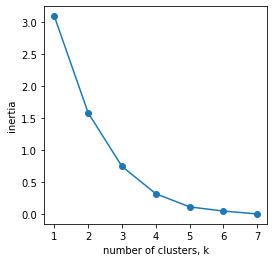

In [ ]:
from sklearn.cluster import KMeans

ks = range(1,8)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(data_x)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3).fit(data_x)

park["cluster"] = kmeans.labels_
park

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,법정동,공원 수,공원 면적률,일반 주차장,장애인 주차장,노인 인구수,외부장애,내부장애,정신적 장애,대중교통 수,사회복지시설 수,총인구,대중교통 이용량,인구밀도,cluster
0,가양동,3,0.03,1,4,10919,3661,536,699,100,8,62939,2.781974e+05,9407.922,0
1,개화동,1,0.06,0,0,4828,1270,101,234,38,3,23371,7.320984e+05,3493.423,0
2,내발산동,3,0.07,1,2,10634,2202,196,340,88,0,79119,3.161334e+05,18314.583,0
3,등촌동,5,0.02,3,6,12831,3933,379,287,67,3,74871,4.152200e+05,32552.609,2
4,마곡동,1,0.00,4,0,3100,645,69,82,70,4,34359,3.974248e+05,7310.426,0
5,방화동,3,0.04,1,6,16675,4289,370,579,93,3,88766,2.991370e+05,9030.112,0
6,염창동,2,0.02,0,3,4385,842,76,129,17,0,41628,1.636455e+06,23924.138,2
7,화곡동,2,0.14,24,14,38117,7459,657,1822,204,12,239271,1.363713e+05,34035.704,1


# K-medoids Clustering

In [ ]:
pca0

,장애인 주차장,노인 인구수,외부장애,내부장애,정신적 장애
0,4,10919,3661,536,699
1,0,4828,1270,101,234
2,2,10634,2202,196,340
3,6,12831,3933,379,287
4,0,3100,645,69,82
5,6,16675,4289,370,579
6,3,4385,842,76,129
7,14,38117,7459,657,1822


In [ ]:
#정규화
from sklearn.preprocessing import MinMaxScaler

data_scaler = MinMaxScaler()
data_x = data_scaler.fit_transform(pca0)

In [ ]:
pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.2 MB/s eta 0:00:00


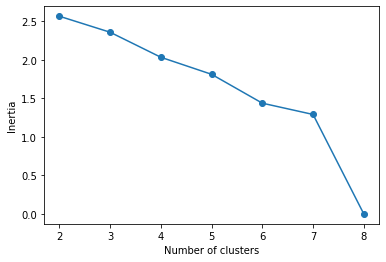

In [ ]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# K-medoids clustering with different cluster numbers
inertias = []
silhouette_scores = []
for n_clusters in range(2, 9):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
    kmedoids.fit(data_x)
    inertias.append(kmedoids.inertia_)

# Elbow method
plt.plot(range(2, 9), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [ ]:
from sklearn_extra.cluster import KMedoids

# K-medoids 모델 생성 및 학습
kmedoids = KMedoids(n_clusters=7, random_state=42)
clusters = kmedoids.fit(data_x)

# cluster 값을 원본 데이터에 넣기
park["cluster"] = clusters.labels_
park

,법정동,공원 수,공원 면적률,일반 주차장,장애인 주차장,노인 인구수,외부장애,내부장애,정신적 장애,대중교통 수,사회복지시설 수,총인구,대중교통 이용량,인구밀도,cluster
0,가양동,3,0.03,1,4,10919,3661,536,699,100,8,62939,2.781974e+05,9407.922,5
1,개화동,1,0.06,0,0,4828,1270,101,234,38,3,23371,7.320984e+05,3493.423,3
2,내발산동,3,0.07,1,2,10634,2202,196,340,88,0,79119,3.161334e+05,18314.583,2
3,등촌동,5,0.02,3,6,12831,3933,379,287,67,3,74871,4.152200e+05,32552.609,1
4,마곡동,1,0.00,4,0,3100,645,69,82,70,4,34359,3.974248e+05,7310.426,6
5,방화동,3,0.04,1,6,16675,4289,370,579,93,3,88766,2.991370e+05,9030.112,0
6,염창동,2,0.02,0,3,4385,842,76,129,17,0,41628,1.636455e+06,23924.138,4
7,화곡동,2,0.14,24,14,38117,7459,657,1822,204,12,239271,1.363713e+05,34035.704,0


In [ ]:
from sklearn.metrics import silhouette_score

# 실루엣 계수 계산
silhouette_avg = silhouette_score(data_x, kmedoids.labels_)
print("클러스터링 결과의 실루엣 계수: {:.3f}".format(silhouette_avg))

클러스터링 결과의 실루엣 계수: -0.097


In [ ]:
pca1 = park[["대중교통 이용량", "인구밀도", "대중교통 수", "총인구"]]
pca1

,대중교통 이용량,인구밀도,대중교통 수,총인구
0,2.781974e+05,9407.922,100,62939
1,7.320984e+05,3493.423,38,23371
2,3.161334e+05,18314.583,88,79119
3,4.152200e+05,32552.609,67,74871
4,3.974248e+05,7310.426,70,34359
5,2.991370e+05,9030.112,93,88766
6,1.636455e+06,23924.138,17,41628
7,1.363713e+05,34035.704,204,239271


In [ ]:
#정규화
from sklearn.preprocessing import MinMaxScaler

data_scaler = MinMaxScaler()
data_x = data_scaler.fit_transform(pca1)

In [ ]:
data_x = pd.DataFrame(data_x)
data_x

,0,1,2,3
0,0.094545,0.193650,0.443850,0.183270
1,0.397129,0.000000,0.112299,0.000000
2,0.119835,0.485267,0.379679,0.258212
3,0.185889,0.951441,0.267380,0.238536
4,0.174026,0.124974,0.283422,0.050894
5,0.108504,0.181279,0.406417,0.302895
6,1.000000,0.668932,0.000000,0.084562
7,0.000000,1.000000,1.000000,1.000000


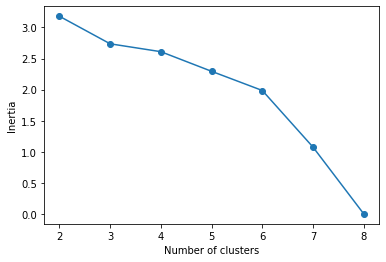

In [ ]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# K-medoids clustering with different cluster numbers
inertias = []
silhouette_scores = []
for n_clusters in range(2, 9):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
    kmedoids.fit(data_x)
    inertias.append(kmedoids.inertia_)

# Elbow method
plt.plot(range(2, 9), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
from sklearn_extra.cluster import KMedoids

# K-medoids 모델 생성 및 학습
kmedoids = KMedoids(n_clusters=6, random_state=42)
clusters = kmedoids.fit(data_x)

# cluster 값을 원본 데이터에 넣기
park["cluster"] = clusters.labels_
park

,법정동,공원 수,공원 면적률,일반 주차장,장애인 주차장,노인 인구수,외부장애,내부장애,정신적 장애,대중교통 수,사회복지시설 수,총인구,대중교통 이용량,인구밀도,cluster
0,가양동,3,0.03,1,4,10919,3661,536,699,100,8,62939,2.781974e+05,9407.922,1
1,개화동,1,0.06,0,0,4828,1270,101,234,38,3,23371,7.320984e+05,3493.423,3
2,내발산동,3,0.07,1,2,10634,2202,196,340,88,0,79119,3.161334e+05,18314.583,2
3,등촌동,5,0.02,3,6,12831,3933,379,287,67,3,74871,4.152200e+05,32552.609,5
4,마곡동,1,0.00,4,0,3100,645,69,82,70,4,34359,3.974248e+05,7310.426,4
5,방화동,3,0.04,1,6,16675,4289,370,579,93,3,88766,2.991370e+05,9030.112,0
6,염창동,2,0.02,0,3,4385,842,76,129,17,0,41628,1.636455e+06,23924.138,3
7,화곡동,2,0.14,24,14,38117,7459,657,1822,204,12,239271,1.363713e+05,34035.704,5


# GMM

In [ ]:
pca0

,장애인 주차장,노인 인구수,외부장애,내부장애,정신적 장애
0,4,10919,3661,536,699
1,0,4828,1270,101,234
2,2,10634,2202,196,340
3,6,12831,3933,379,287
4,0,3100,645,69,82
5,6,16675,4289,370,579
6,3,4385,842,76,129
7,14,38117,7459,657,1822


In [ ]:
#정규화
from sklearn.preprocessing import MinMaxScaler

data_scaler = MinMaxScaler()
data_x = data_scaler.fit_transform(pca0)

In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np

# X: input data, n_components: the number of mixture components to fit
def gmm_bic(X, n_components):
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(X)
    log_likelihood = gmm.score(X)
    n_features = X.shape[1]
    n_params = n_components * (n_features + 1) * n_features / 2 + n_components * n_features + n_components - 1
    bic = -2 * log_likelihood + n_params * np.log(X.shape[0])
    return bic

In [ ]:
c = []
for i in range(2,8) :
  a = gmm_bic(data_x, i)
  a = c.append(a)
  print(c)


[67.97145567092832]
[67.97145567092832, 92.90565188881668]
[67.97145567092832, 92.90565188881668, 130.44516861171525]
[67.97145567092832, 92.90565188881668, 130.44516861171525, 169.21690387829202]
[67.97145567092832, 92.90565188881668, 130.44516861171525, 169.21690387829202, 208.47614455975378]
[67.97145567092832, 92.90565188881668, 130.44516861171525, 169.21690387829202, 208.47614455975378, 250.0942976208062]


In [ ]:
c

[67.97145567092832,
 92.90565188881668,
 130.44516861171525,
 169.21690387829202,
 208.47614455975378,
 250.0942976208062]

In [ ]:
columns = ["BIC"]
bic = pd.DataFrame(c, columns=columns)
bic.rename(index={0:"2개", 1:"3개", 2:"4개", 3:"5개", 4:"6개", 5:"7개", 6:"8개"})

,BIC
2개,67.971456
3개,92.905652
4개,130.445169
5개,169.216904
6개,208.476145
7개,250.094298


In [ ]:
# 군집개수 = 3
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture

gmm = GaussianMixture(n_components=3, covariance_type = "diag", random_state=0, n_init=10)
gmm.fit(data_x)
gmm_label = gmm.predict(data_x)
park['gmm_label'] = gmm_label
park

,법정동,공원 수,공원 면적률,일반 주차장,장애인 주차장,노인 인구수,외부장애,내부장애,정신적 장애,대중교통 수,사회복지시설 수,총인구,대중교통 이용량,인구밀도,cluster,gmm_label
0,가양동,3,0.03,1,4,10919,3661,536,699,100,8,62939,2.781974e+05,9407.922,1,2
1,개화동,1,0.06,0,0,4828,1270,101,234,38,3,23371,7.320984e+05,3493.423,3,0
2,내발산동,3,0.07,1,2,10634,2202,196,340,88,0,79119,3.161334e+05,18314.583,2,0
3,등촌동,5,0.02,3,6,12831,3933,379,287,67,3,74871,4.152200e+05,32552.609,5,2
4,마곡동,1,0.00,4,0,3100,645,69,82,70,4,34359,3.974248e+05,7310.426,4,0
5,방화동,3,0.04,1,6,16675,4289,370,579,93,3,88766,2.991370e+05,9030.112,0,2
6,염창동,2,0.02,0,3,4385,842,76,129,17,0,41628,1.636455e+06,23924.138,3,0
7,화곡동,2,0.14,24,14,38117,7459,657,1822,204,12,239271,1.363713e+05,34035.704,5,1


In [ ]:
pca1

,대중교통 이용량,인구밀도,대중교통 수,총인구
0,2.781974e+05,9407.922,100,62939
1,7.320984e+05,3493.423,38,23371
2,3.161334e+05,18314.583,88,79119
3,4.152200e+05,32552.609,67,74871
4,3.974248e+05,7310.426,70,34359
5,2.991370e+05,9030.112,93,88766
6,1.636455e+06,23924.138,17,41628
7,1.363713e+05,34035.704,204,239271


In [ ]:
#정규화
from sklearn.preprocessing import MinMaxScaler

data_scaler = MinMaxScaler()
data_x = data_scaler.fit_transform(pca1)

In [ ]:
c = []
for i in range(2,8) :
  a = gmm_bic(data_x, i)
  a = c.append(a)
  print(c)

[50.71711859014941]
[50.71711859014941, 73.18807491040889]
[50.71711859014941, 73.18807491040889, 100.3862632734248]
[50.71711859014941, 73.18807491040889, 100.3862632734248, 123.41473248850767]
[50.71711859014941, 73.18807491040889, 100.3862632734248, 123.41473248850767, 147.7009353186414]
[50.71711859014941, 73.18807491040889, 100.3862632734248, 123.41473248850767, 147.7009353186414, 174.48813174044898]


In [ ]:
c

[50.71711859014941,
 73.18807491040889,
 100.3862632734248,
 123.41473248850767,
 147.7009353186414,
 174.48813174044898]

In [ ]:
columns = ["BIC"]
bic = pd.DataFrame(c, columns=columns)
bic.rename(index={0:"2개", 1:"3개", 2:"4개", 3:"5개", 4:"6개", 5:"7개", 6:"8개"})

,BIC
2개,50.717119
3개,73.188075
4개,100.386263
5개,123.414732
6개,147.700935
7개,174.488132


In [ ]:
# 군집개수 = 3
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture

gmm = GaussianMixture(n_components=3, covariance_type = "diag", random_state=0, n_init=10)
gmm.fit(data_x)
gmm_label = gmm.predict(data_x)
park['gmm_label'] = gmm_label
park

,법정동,공원 수,공원 면적률,일반 주차장,장애인 주차장,노인 인구수,외부장애,내부장애,정신적 장애,대중교통 수,사회복지시설 수,총인구,대중교통 이용량,인구밀도,cluster,gmm_label
0,가양동,3,0.03,1,4,10919,3661,536,699,100,8,62939,2.781974e+05,9407.922,1,0
1,개화동,1,0.06,0,0,4828,1270,101,234,38,3,23371,7.320984e+05,3493.423,3,0
2,내발산동,3,0.07,1,2,10634,2202,196,340,88,0,79119,3.161334e+05,18314.583,2,0
3,등촌동,5,0.02,3,6,12831,3933,379,287,67,3,74871,4.152200e+05,32552.609,5,0
4,마곡동,1,0.00,4,0,3100,645,69,82,70,4,34359,3.974248e+05,7310.426,4,0
5,방화동,3,0.04,1,6,16675,4289,370,579,93,3,88766,2.991370e+05,9030.112,0,0
6,염창동,2,0.02,0,3,4385,842,76,129,17,0,41628,1.636455e+06,23924.138,3,2
7,화곡동,2,0.14,24,14,38117,7459,657,1822,204,12,239271,1.363713e+05,34035.704,5,1


# EDA

<function matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, hatch=None, data=None)>

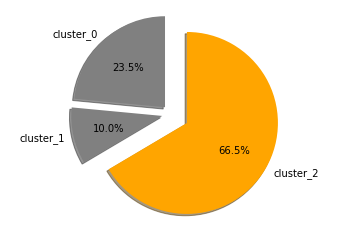

In [ ]:
import matplotlib.pyplot as plt

labels = ["cluster_0", "cluster_1", "cluster_2"]
sizes = [13475,5737,38117]
explode = (0.1,0.1,0.2)
colors = ["gray","gray","orange"]
plt.pie(sizes, explode = explode, colors=colors, labels = labels, autopct = "%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.pie

<function matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, hatch=None, data=None)>

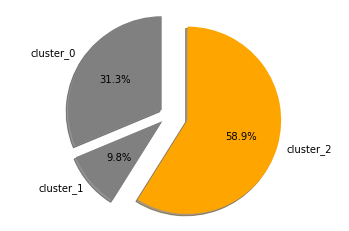

In [ ]:
import matplotlib.pyplot as plt

labels = ["cluster_0", "cluster_1", "cluster_2"]
sizes = [3961,1240,7459]
explode = (0.1,0.1,0.2)
colors = ["gray","gray","orange"]
plt.pie(sizes, explode = explode, colors=colors, labels = labels, autopct = "%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.pie

<function matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, hatch=None, data=None)>

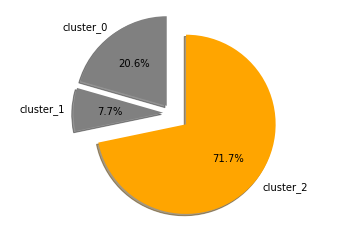

In [ ]:
import matplotlib.pyplot as plt

labels = ["cluster_0", "cluster_1", "cluster_2"]
sizes = [522,196,1822]
explode = (0.1,0.1,0.2)
colors = ["gray","gray","orange"]
plt.pie(sizes, explode = explode, colors=colors, labels = labels, autopct = "%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.pie

<function matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, hatch=None, data=None)>

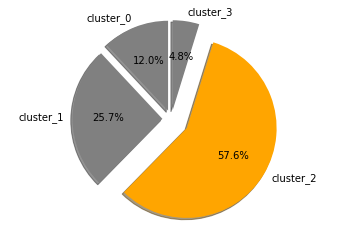

In [ ]:
import matplotlib.pyplot as plt

labels = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
sizes = [3.41,7.32,16.4,1.36]
explode = (0.1,0.1,0.2,0.1)
colors = ["gray","gray","orange","gray"]
plt.pie(sizes, explode = explode, colors=colors, labels = labels, autopct = "%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.pie

<function matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, hatch=None, data=None)>

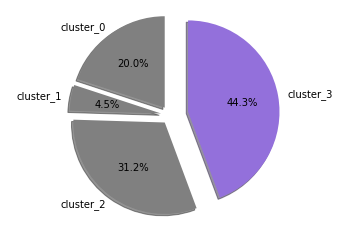

In [ ]:
import matplotlib.pyplot as plt

labels = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
sizes = [15323,3493,23924,34035]
explode = (0.1,0.1,0.1,0.2)
colors = ["gray","gray","gray","mediumpurple"]
plt.pie(sizes, explode = explode, colors=colors, labels = labels, autopct = "%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.pie

<function matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, hatch=None, data=None)>

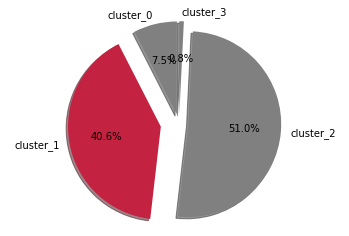

In [ ]:
import matplotlib.pyplot as plt

labels = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
sizes = [5.8,31.3,39.3,0.6]
explode = (0.1,0.2,0.1,0.1)
colors = ["gray","#C42241","gray","gray"]
plt.pie(sizes, explode = explode, colors=colors, labels = labels, autopct = "%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.pie

<function matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, hatch=None, data=None)>

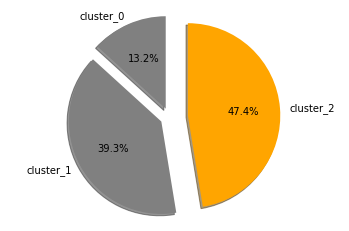

In [ ]:
import matplotlib.pyplot as plt

labels = ["cluster_0", "cluster_1", "cluster_2"]
sizes = [9510,28238,34035]
explode = (0.1,0.1,0.2)
colors = ["gray","gray","orange"]
plt.pie(sizes, explode = explode, colors=colors, labels = labels, autopct = "%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.pie

<function matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, hatch=None, data=None)>

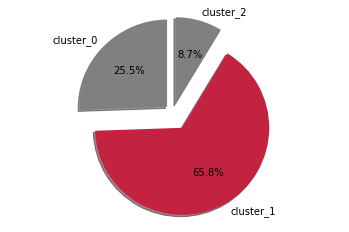

In [ ]:
import matplotlib.pyplot as plt

labels = ["cluster_0", "cluster_1", "cluster_2"]
sizes = [4,10.3,1.36]
explode = (0.1,0.2,0.1)
colors = ["gray","#C42241","gray"]
plt.pie(sizes, explode = explode, colors=colors, labels = labels, autopct = "%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.pie

<function matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, hatch=None, data=None)>

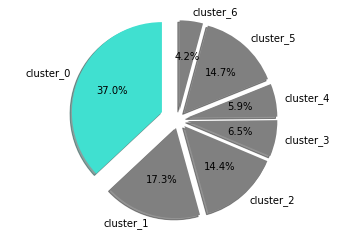

In [ ]:
labels = ["cluster_0", "cluster_1", "cluster_2", "cluster_3", "cluster_4", "cluster_5", "cluster_6"]
sizes = [27396,12831,10634,4828,4385,10919,3100]
explode = (0.2,0.1,0.1,0.1,0.1,0.1,0.1)
colors = ["turquoise","gray","gray","gray","gray","gray","gray"]
plt.pie(sizes, explode = explode, colors=colors, labels = labels, autopct = "%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.pie

<function matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, hatch=None, data=None)>

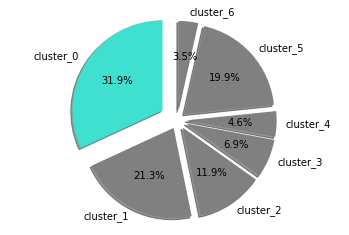

In [ ]:
labels = ["cluster_0", "cluster_1", "cluster_2", "cluster_3", "cluster_4", "cluster_5", "cluster_6"]
sizes = [5874,3933,2202,1270,842,3661,645]
explode = (0.2,0.1,0.1,0.1,0.1,0.1,0.1)
colors = ["turquoise","gray","gray","gray","gray","gray","gray"]
plt.pie(sizes, explode = explode, colors=colors, labels = labels, autopct = "%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.pie

<function matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, hatch=None, data=None)>

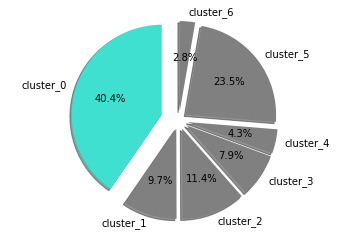

In [ ]:
labels = ["cluster_0", "cluster_1", "cluster_2", "cluster_3", "cluster_4", "cluster_5", "cluster_6"]
sizes = [1200,287,340,234,129,699,82]
explode = (0.2,0.1,0.1,0.1,0.1,0.1,0.1)
colors = ["turquoise","gray","gray","gray","gray","gray","gray"]
plt.pie(sizes, explode = explode, colors=colors, labels = labels, autopct = "%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.pie

<function matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, hatch=None, data=None)>

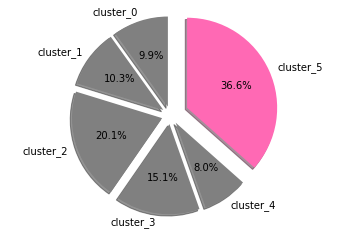

In [ ]:
labels = ["cluster_0", "cluster_1", "cluster_2", "cluster_3", "cluster_4", "cluster_5"]
sizes = [9030,9407,18314,13708,7310,33293]
explode = (0.1,0.1,0.1,0.1,0.1,0.2)
colors = ["gray","gray","gray","gray","gray","hotpink"]
plt.pie(sizes, explode = explode, colors=colors, labels = labels, autopct = "%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.pie

<function matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, hatch=None, data=None)>

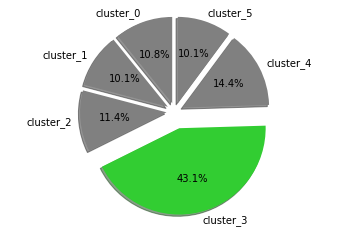

In [ ]:
labels = ["cluster_0", "cluster_1", "cluster_2", "cluster_3", "cluster_4", "cluster_5"]
sizes = [2.99,2.78,3.16,11.9,3.97,2.8]
explode = (0.1,0.1,0.1,0.2,0.1,0.1)
colors = ["gray","gray","gray","limegreen","gray","gray"]
plt.pie(sizes, explode = explode, colors=colors, labels = labels, autopct = "%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.pie

<function matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, hatch=None, data=None)>

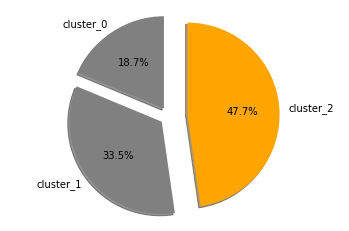

In [ ]:
labels = ["cluster_0", "cluster_1", "cluster_2"]
sizes = [13351,23924,34035]
explode = (0.1,0.1,0.2)
colors = ["gray","gray","orange"]
plt.pie(sizes, explode = explode, colors=colors, labels = labels, autopct = "%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.pie

<function matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, hatch=None, data=None)>

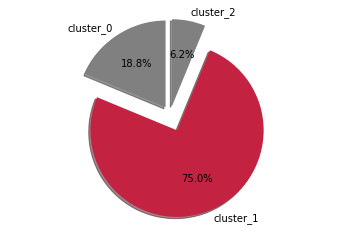

In [ ]:
labels = ["cluster_0", "cluster_1", "cluster_2"]
sizes = [4.1,16.4,1.36]
explode = (0.1,0.2,0.1)
colors = ["gray","#C42241","gray"]
plt.pie(sizes, explode = explode, colors=colors, labels = labels, autopct = "%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.pie